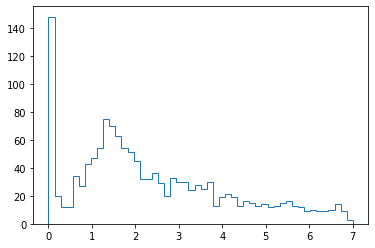

In [3]:
import matplotlib.pyplot as plt
from electron_gun import generate_electron_curve

out = generate_electron_curve("./psiK_1000.root")
plt.hist(out, range=(0, 7), bins=50, histtype='step')
plt.show()

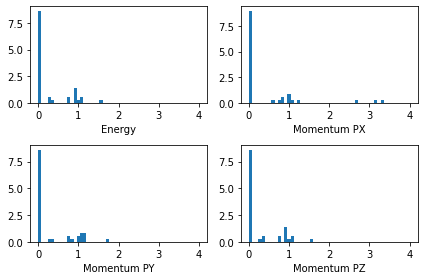

In [1]:
import matplotlib.pyplot as plt
from electron_gun import generate_electron_momentum_curve

e, px, py, pz = generate_electron_momentum_curve("./1000ev.root")
fig, axes = plt.subplots(2, 2)
axes[0, 0].hist(e, range=(0, 4), bins=50, density=True)
axes[0, 1].hist(px, range=(0, 4), bins=50, density=True)
axes[1, 0].hist(py, range=(0, 4), bins=50, density=True)
axes[1, 1].hist(pz, range=(0, 4), bins=50, density=True)
axes[0, 0].set_xlabel("Energy")
axes[0, 1].set_xlabel("Momentum PX")
axes[1, 0].set_xlabel("Momentum PY")
axes[1, 1].set_xlabel("Momentum PZ")
plt.tight_layout()
plt.show()

5073.357436648051


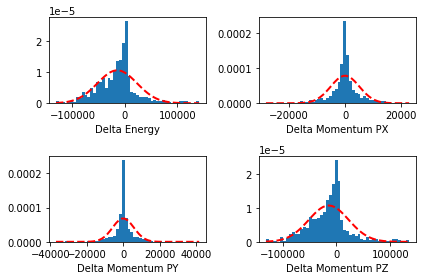

In [4]:
from electron_gun import generate_electron_momentum_delta
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy.stats import norm

momenta = generate_electron_momentum_delta("./1000ev.root")
fig, axes = plt.subplots(2, 2)

e = [m.e for m in momenta]
n, bins, patches = axes[0, 0].hist(e, bins=50, density=True)
(mu, sigma) = norm.fit(e)
y = norm.pdf(bins, loc=mu, scale=sigma)
l = axes[0, 0].plot(bins, y, 'r--', linewidth=2)

p_x = [m.p_x for m in momenta]
n, bins, patches = axes[0, 1].hist(p_x, bins=50, density=True)
(mu, sigma) = norm.fit(p_x)
print(sigma)
y = norm.pdf(bins, loc=mu, scale=sigma)
l = axes[0, 1].plot(bins, y, 'r--', linewidth=2)

p_y = [m.p_y for m in momenta]
n, bins, patches = axes[1, 0].hist(p_y, bins=50, density=True)
(mu, sigma) = norm.fit(p_y)
y = norm.pdf(bins, loc=mu, scale=sigma)
l = axes[1, 0].plot(bins, y, 'r--', linewidth=2)

p_z = [m.p_z for m in momenta]
n, bins, patches = axes[1, 1].hist(p_z, bins=50, density=True)
(mu, sigma) = norm.fit(p_z)
y = norm.pdf(bins, loc=mu, scale=sigma)
l = axes[1, 1].plot(bins, y, 'r--', linewidth=2)
axes[0, 0].set_xlabel("Delta Energy")
axes[0, 1].set_xlabel("Delta Momentum PX")
axes[1, 0].set_xlabel("Delta Momentum PY")
axes[1, 1].set_xlabel("Delta Momentum PZ")

plt.tight_layout()
plt.show()

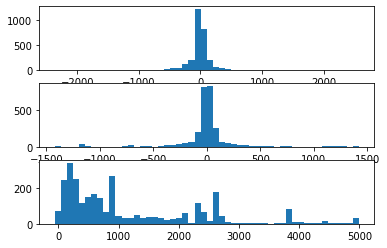

In [8]:
import matplotlib.pyplot as plt
from electron_gun import generate_ov_distribution

ovx, ovy, ovz = generate_ov_distribution("./1000ev.root")

fig, axes = plt.subplots(3, 1)
axes[0].hist(ovx, bins=50)
axes[1].hist(ovy, bins=50)
axes[2].hist(ovz, bins=50)
plt.show()

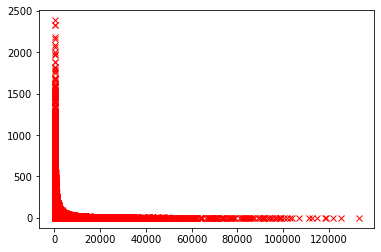

In [3]:
from psiK import get_uncertainty_graphs

get_uncertainty_graphs('1000ev.root')

In [1]:
from psiK import plot_energy_disto

plot_energy_disto('1000ev.root')

(1519,)
(6089,)
(1519,)
(4799,)


(array([133061.3137207 , 114011.359375  , 133061.3137207 , ...,
        110555.50585938, 110555.50585938, 110555.50585938]),
 array([ 4403.61621094,   110.94013214,  4354.60498047, ...,
        33153.67578125,   267.33267212, 43426.46875   ]),
 array([64834.2265625 ,  3558.90258789, 19381.49804688, ...,
        61754.62109375, 59895.30859375, 55279.44140625]))

[21:10:13] WARNING: /private/var/folders/h4/xn394t6140g90b5dhr7hl1n40000gn/T/pip-install-1b5gzcgs/xgboost_e8996f132b654debbc7a5a7211bb9190/build/temp.macosx-12-arm64-3.9/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
97.26559054423569
93.88888888888889


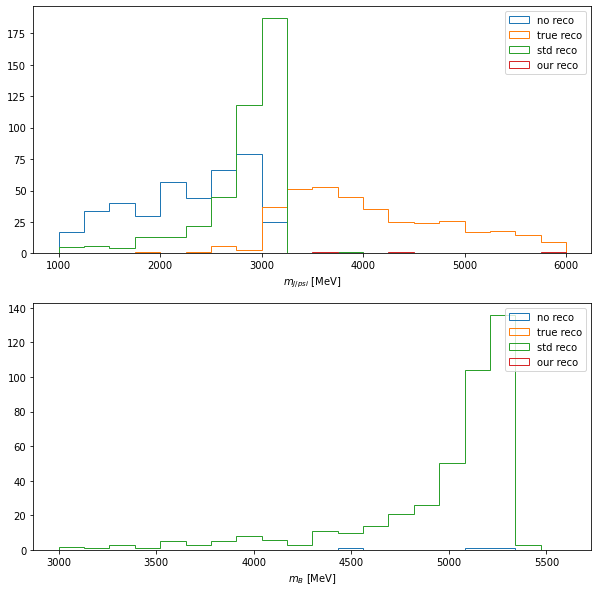

In [3]:
from electron_reconstuction import unpack_data, generate_data_mixing, generate_prepared_data, plot_masses, train_xgboost
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (10, 10)
event_data = unpack_data("./psiK_1000.root")
data = generate_data_mixing(event_data)
training_data, training_labels, validation_data, validation_labels = generate_prepared_data(data)
classifier = train_xgboost(training_data, training_labels, validation_data, validation_labels)
plot_masses(classifier, event_data)

/Users/will/Documents/msci-brem-reconstruction/.venv/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:02:28] WARNING: /private/var/folders/h4/xn394t6140g90b5dhr7hl1n40000gn/T/pip-install-1b5gzcgs/xgboost_e8996f132b654debbc7a5a7211bb9190/build/temp.macosx-12-arm64-3.9/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
99.55826672275978
95.27410207939508
ModeResult(mode=array([599.50987146]), count=array([1]))


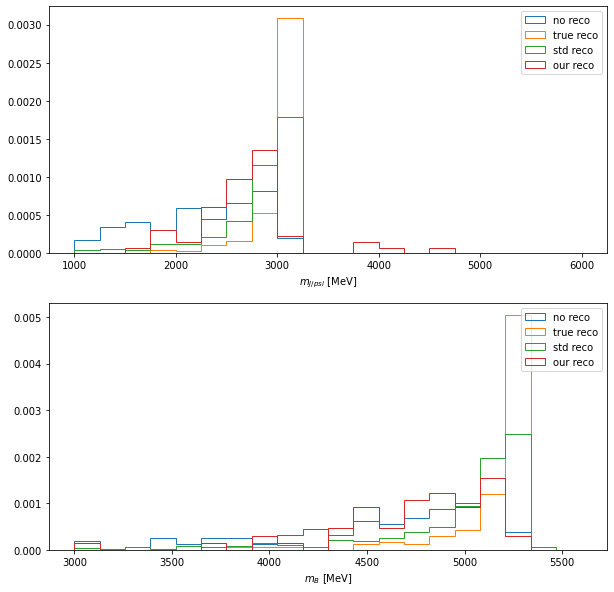

In [4]:
from psiK import *
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (10, 10)


data_interfaces = generate_data_interface("psiK_1000.root")
data = generate_data_mixing(data_interfaces)
training_data, training_labels, validation_data, validation_labels = generate_prepared_data(data)
classifier = train_xgboost(training_data, training_labels, validation_data, validation_labels)
plot_masses(classifier, data_interfaces, 4000)